### Import PyODAM modules

In [1]:
from PyODAM import Odam
import PyODAM_pca as pcapo

### Get the data from ODAM

In [2]:
## API Call to retrieve data
po = Odam('https://pmb-bordeaux.fr','frim1')
d = po.getSubsetFromODAM('qNMR_metabo')

## Retrieve factors
d['factor']['Attribute']

0    Treatment
1     DevStage
2     FruitAge
Name: Attribute, dtype: object

In [3]:
# Matrix X
X = d['data'][d['numvars']] # .fillna(value=0)

# Choose 'DevStage' as Factor (index=1)
facname = d['factor'].Attribute[1]
Y = d['data'][facname]

# Factor levels
factorlevels = []
for f in Y:
    if f not in factorlevels:
        factorlevels.append(f)
factorlevels

['FF.01', 'FF.03', 'FR.01', 'FR.04', 'FR.02', 'FF.04', 'FF.02', 'FR.03']

### Compute then plot PCA

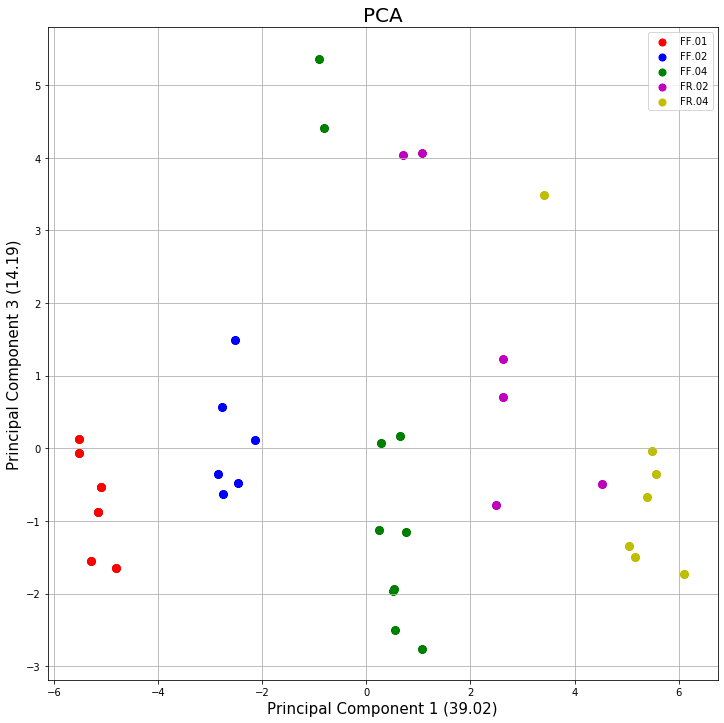

In [4]:
# Compute PCA
res_pca = pcapo.PCA_compute(X, Y, n=3, scale=True)

# Factor level selection
FacLevSel = ['FF.01', 'FF.02', 'FF.04', 'FR.02', 'FR.04']

# To change, see with %matplotlib -l
%matplotlib inline

# Plot PCA Scores
pcapo.plotPCA(res_pca, 1, 3, FacLevSel)

In [5]:
# Explained Variance (%)
res_pca['EV']

array([39.01761192, 23.4160558 , 14.18657644])

#### 0ct, 4 2019  - Daniel Jacob INRA UMR 1332 - MetaboHub Bordeaux

In [6]:
X

,glucose,saccharose,fructose,galactose,mannose,rhamnose,acetate,chlorogenate,citrate,fumarate,...,glutamate,isoleucine,phenylalanine,tryptophane,tyrosine,valine,pyroglutamate,trigonelline,choline,inositol
0,409.395048,70.361993,372.900223,0.000000,3.421804,4.306313,9.690943,11.789979,181.076910,0.103071,...,14.045120,0.697391,1.132535,0.000000,0.676021,0.735527,8.111344,2.856803,5.842694,67.451803
1,725.001347,33.077868,871.703642,0.000000,3.232350,5.516333,3.495464,1.948569,79.309584,0.129083,...,16.999228,2.778422,4.454867,0.000000,1.198732,1.891115,8.426480,1.059082,5.645444,67.541657
2,723.106878,27.736669,970.415060,0.000000,3.654343,5.728018,4.849332,1.993371,131.804643,0.119821,...,21.372505,4.099574,6.574502,0.291992,2.646476,2.315180,30.310212,1.202274,6.812038,81.703914
3,801.762466,27.508535,1103.460076,4.104895,3.988415,6.108214,3.688220,0.932325,178.021061,0.085298,...,78.580005,1.936888,5.829686,0.583695,1.351375,0.865624,21.567445,0.938772,7.583733,70.658871
4,801.762466,27.508535,1103.460076,4.104895,3.988415,6.108214,3.688220,0.932325,178.021061,0.085298,...,78.580005,1.936888,5.829686,0.583695,1.351375,0.865624,21.567445,0.938772,7.583733,70.658871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1005.549285,46.595898,1205.696842,4.533999,3.950478,6.890524,3.244209,0.906041,204.128506,0.019093,...,89.557282,2.579927,6.036849,0.635022,1.193425,1.067214,22.631188,0.842316,7.844255,43.532386
932,445.215159,43.313694,541.680460,0.000000,3.979801,5.251411,5.904039,3.950962,113.303711,0.096171,...,12.584750,2.276662,3.177193,0.000000,0.508106,1.902242,10.621845,1.081956,4.896054,53.522845
933,706.282691,26.798312,909.271129,0.000000,2.922090,5.442421,4.118693,2.120781,99.435798,0.167727,...,17.794818,4.570468,6.376808,0.000000,2.116115,3.388764,23.539539,0.927289,6.049645,60.266334
934,828.097855,34.459183,959.554309,0.000000,3.165411,5.591939,4.458076,1.942538,128.691353,0.151848,...,18.579829,4.313604,6.020745,0.291305,2.073777,2.804146,25.808290,1.156369,5.699324,57.056593
